In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load dataset

df = pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

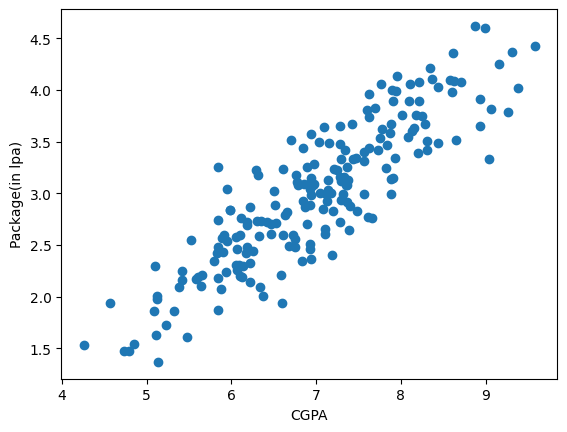

In [4]:
# Visualize the data

plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [5]:
# Define features (X) and target (y)
X = df.iloc[:, 0:1]   # CGPA
y = df.iloc[:, -1]    # Package


In [6]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [7]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
LR = LinearRegression()

In [10]:
LR.fit(X_train,y_train)

LinearRegression()

In [11]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [12]:
y_test

,package
112,4.10
29,3.49
182,2.08
199,2.33
193,1.94
85,1.48
10,1.86
54,3.09
115,4.21
35,2.87


In [13]:
# Predict on test data

y_pred = LR.predict(X_test)

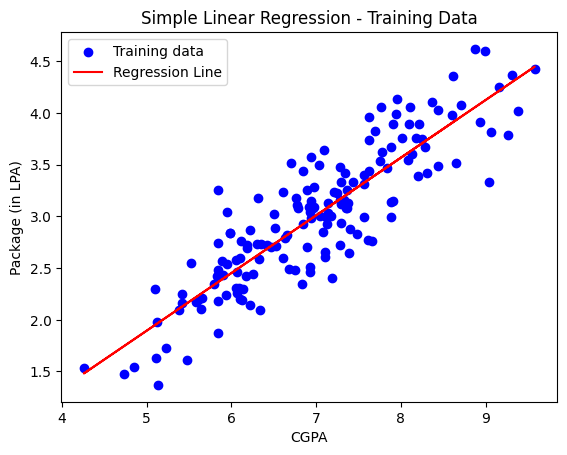

In [14]:
# Plot the regression line

plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, LR.predict(X_train), color='red', label='Regression Line')
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')
plt.legend()
plt.title('Simple Linear Regression - Training Data')
plt.show()

In [15]:
# Comparing actual vs predicted

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())


     Actual  Predicted
112    4.10   3.891116
29     3.49   3.093245
182    2.08   2.384646
199    2.33   2.574349
193    1.94   1.653729


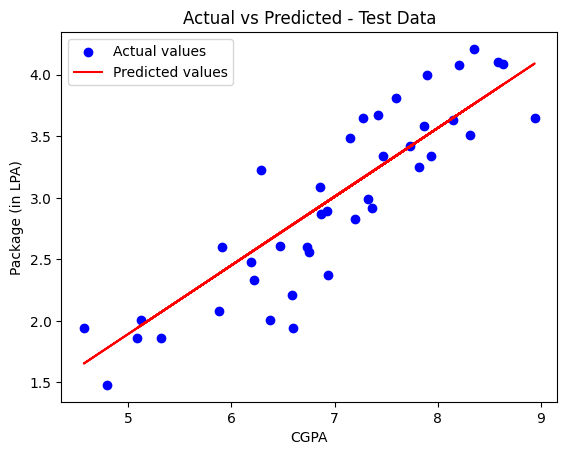

In [16]:
# Predicting on the test data
y_pred = LR.predict(X_test)

# Visualize actual vs predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', label='Predicted values')
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')
plt.title('Actual vs Predicted - Test Data')
plt.legend()
plt.show()


In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [18]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.12129235313495527


In [19]:
print('Mean absolute Error:', mean_absolute_error(y_test, y_pred))

Mean absolute Error: 0.2884710931878175


In [20]:
print('R2 Score',r2_score(y_test, y_pred))

R2 Score 0.780730147510384


In [21]:
print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 0.34827051717731616


In [22]:
n = X_test.shape[0]
p = X_test.shape[1]

In [23]:
n

40

In [24]:
p

1

In [25]:
# R2 adjusted

r2 = r2_score(y_test, y_pred)


adjusted_r2 = 1 -(1-r2) * (40-1)/ (40-1-1)
adjusted_r2

0.7749598882343415

In [26]:
# R2 adjusted
# irrelevant column

new_df = df.copy()

In [27]:
new_df['random_feature'] = np.random.random(size = len(df))

new_df = new_df[['cgpa','random_feature','package']]

In [28]:
new_df.head()

,cgpa,random_feature,package
0,6.89,0.625507,3.26
1,5.12,0.060958,1.98
2,7.82,0.094132,3.25
3,7.42,0.581796,3.67
4,6.94,0.523111,3.57


Text(0, 0.5, 'Package(in LPA)')

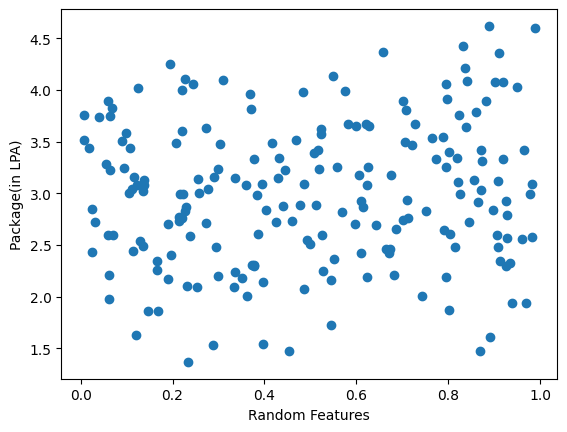

In [29]:
plt.scatter(new_df['random_feature'], new_df['package'])
plt.xlabel('Random Features')
plt.ylabel('Package(in LPA)')

In [30]:
X = new_df.iloc[:, 0:2]
y = new_df.iloc[:, -1]

In [31]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(X_test)

In [35]:
print('R2 Score',r2_score(y_test, y_pred))

R2 Score 0.7787937130842202


In [36]:
adjusted_r2 = 1 -(1-r2) * (40-1)/ (40-1-1)
adjusted_r2

0.7749598882343415

In [42]:
# R2 adjusted
# irrelevant column

new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]


In [43]:
new_df2.sample(5)

,cgpa,iq,package
9,8.31,2.91,3.51
154,7.08,2.65,2.85
3,7.42,4.27,3.67
184,7.88,2.54,3.14
114,5.84,1.27,1.87


Text(0, 0.5, 'Package(in lpa)')

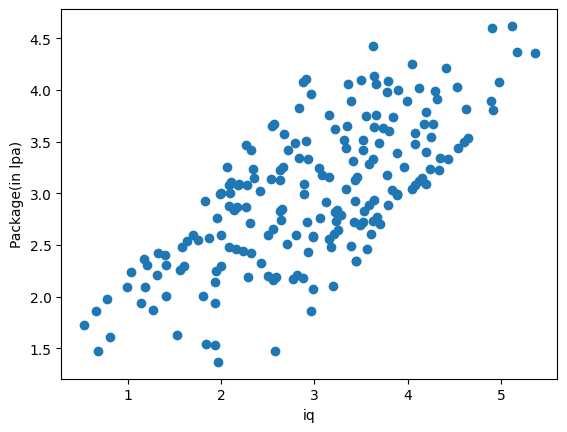

In [44]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [45]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [47]:
lr = LinearRegression()


In [48]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [49]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8435931882835215


In [50]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8351387660285767

In [38]:
!mkdir -p CampusX-ML-Learning/Week1_Regression

In [39]:
!mkdir -p CampusX-MLp-Learning/Week2_Classification

In [40]:
!mv /Simple_Linear_Regression.ipynb CampusX-ML-Learning/Week1_Regression/

mv: cannot stat '/Simple_Linear_Regression.ipynb': No such file or directory


In [41]:
!ls /content



CampusX-ML-Learning  CampusX-MLp-Learning  placement.csv  sample_data
